<a href="https://colab.research.google.com/github/Nikhilrana82/deep-learning-lab/blob/main/24MCS124_p5_Nikhil_Rana.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install wandb

In [2]:
!wandb login

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit: 
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: 24mcs124 (24mcs124-national-institute-of-technology-hamirpur) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


In [3]:
import wandb
import random

# start a new wandb run to track this script
wandb.init(
    # set the wandb project where this run will be logged
    project="my-awesome-project",

    # track hyperparameters and run metadata
    config={
    "learning_rate": 0.02,
    "architecture": "CNN",
    "dataset": "CIFAR-100",
    "epochs": 10,
    }
)

# simulate training
epochs = 10
offset = random.random() / 5
for epoch in range(2, epochs):
    acc = 1 - 2 ** -epoch - random.random() / epoch - offset
    loss = 2 ** -epoch + random.random() / epoch + offset

    # log metrics to wandb
    wandb.log({"acc": acc, "loss": loss})

# [optional] finish the wandb run, necessary in notebooks
wandb.finish()

wandb: Currently logged in as: 24mcs124 (24mcs124-national-institute-of-technology-hamirpur) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


acc,▁▅▇▇▇█▇█
loss,█▂▂▂▁▁▁▁
acc,0.91517
loss,0.14472


1. Implement the Dropout Function for a Single Layer

In [4]:
import numpy as np

def dropout_layer(X, dropout_prob):
    if dropout_prob < 0 or dropout_prob > 1:
        raise ValueError("Dropout probability must be between 0 and 1.")

    # Generate a mask using a uniform distribution
    mask = np.random.rand(*X.shape) > dropout_prob

    # Apply the mask and rescale the remaining values
    if dropout_prob > 0:
        return (X * mask) / (1 - dropout_prob)
    else:
        return X

# Test the dropout layer
X = np.random.rand(5, 5)  # Example input tensor
dropout_prob = 0.5
print("Original X:\n", X)
print("X after dropout:\n", dropout_layer(X, dropout_prob))

Original X:
 [[0.9563562  0.77768261 0.15044639 0.74220567 0.66535291]
 [0.09828907 0.13404241 0.50422356 0.77524242 0.68154111]
 [0.61396067 0.6928662  0.69570554 0.01146361 0.13971205]
 [0.0315428  0.84376264 0.25479928 0.31071344 0.76480928]
 [0.53524112 0.28986743 0.31903391 0.05769373 0.93368435]]
X after dropout:
 [[0.         1.55536523 0.         1.48441134 0.        ]
 [0.19657814 0.26808482 0.         0.         0.        ]
 [0.         1.38573241 0.         0.02292721 0.        ]
 [0.0630856  1.68752529 0.50959856 0.62142689 1.52961856]
 [1.07048225 0.57973485 0.63806783 0.         0.        ]]


#This code implements a dropout layer for neural networks using NumPy. The key steps are:

1.Input Validation: The function checks that the dropout_prob is between 0 and 1.

2.Mask Creation: A random mask is generated based on the dropout_prob. The mask is an array of the same shape as the input X, where each element is randomly set to True or False based on the dropout probability.

3.Apply Dropout: The input X is element-wise multiplied by the mask. The elements that correspond to False in the mask are "dropped" (set to zero). Afterward, the remaining values are rescaled by dividing by (1 - dropout_prob) to ensure the expected value remains the same during training.

4.Return: The output tensor after applying dropout is returned.

Example: A random 5x5 matrix X is created, and the dropout is applied with a probability of 0.5. The resulting output has some elements dropped (set to 0) and the rest scaled appropriately.

2. Implement Dropout Layer in a Neural Network Model

In [5]:
import torch
import torch.nn as nn
import torch.optim as optim

class DropoutNN(nn.Module):
    """
    Neural network with dropout layers.
    """
    def __init__(self, input_size, hidden_size, output_size, dropout_prob):
        super(DropoutNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.dropout1 = nn.Dropout(dropout_prob)
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.dropout2 = nn.Dropout(dropout_prob)
        self.fc3 = nn.Linear(hidden_size, output_size)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.dropout1(x)
        x = self.relu(self.fc2(x))
        x = self.dropout2(x)
        x = self.fc3(x)
        return x

# Example usage
input_size = 784  # For MNIST
hidden_size = 1024
output_size = 10
dropout_prob = 0.5
model = DropoutNN(input_size, hidden_size, output_size, dropout_prob)
print(model)

DropoutNN(
  (fc1): Linear(in_features=784, out_features=1024, bias=True)
  (dropout1): Dropout(p=0.5, inplace=False)
  (fc2): Linear(in_features=1024, out_features=1024, bias=True)
  (dropout2): Dropout(p=0.5, inplace=False)
  (fc3): Linear(in_features=1024, out_features=10, bias=True)
  (relu): ReLU()
)


Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 9.91M/9.91M [00:00<00:00, 38.4MB/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 28.9k/28.9k [00:00<00:00, 1.19MB/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 1.65M/1.65M [00:00<00:00, 10.8MB/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 4.54k/4.54k [00:00<00:00, 7.95MB/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



Epoch 1/5, Train Loss: 0.4430, Train Accuracy: 86.02%, Test Accuracy: 93.85%
Epoch 2/5, Train Loss: 0.2994, Train Accuracy: 90.85%, Test Accuracy: 95.30%
Epoch 3/5, Train Loss: 0.2624, Train Accuracy: 92.01%, Test Accuracy: 95.67%
Epoch 4/5, Train Loss: 0.2362, Train Accuracy: 93.02%, Test Accuracy: 96.33%
Epoch 5/5, Train Loss: 0.2300, Train Accuracy: 93.13%, Test Accuracy: 95.62%


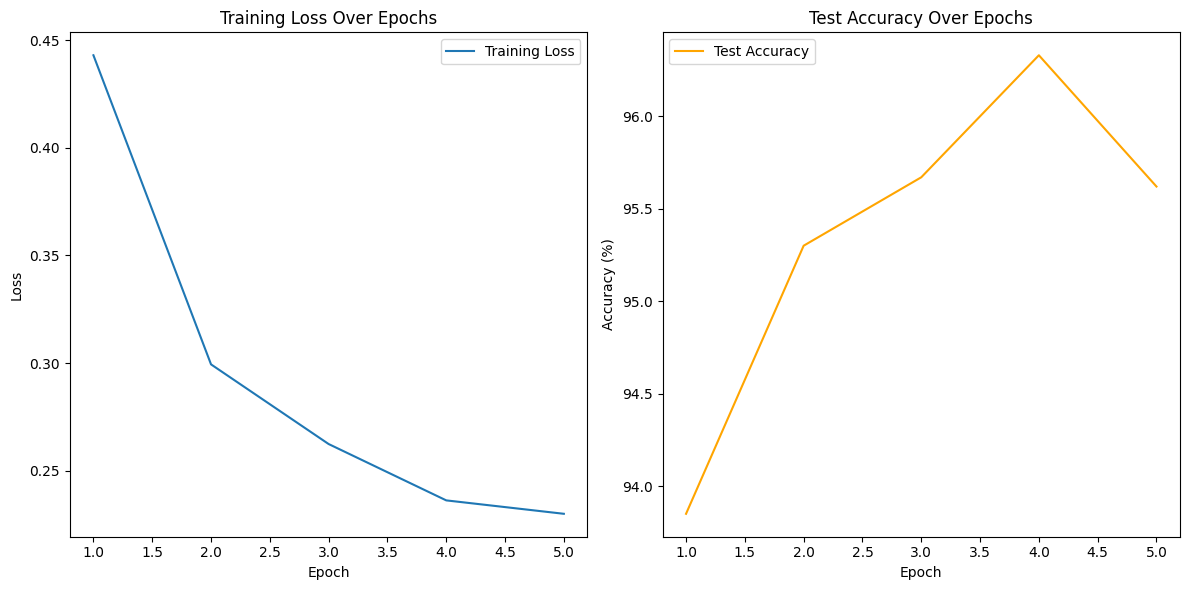

In [6]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import torchvision
from torchvision import transforms
import matplotlib.pyplot as plt

# Define the DropoutNN Model (as per the code you've provided)
class DropoutNN(nn.Module):
    """
    Neural network with dropout layers.
    """
    def __init__(self, input_size, hidden_size, output_size, dropout_prob):
        super(DropoutNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.dropout1 = nn.Dropout(dropout_prob)
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.dropout2 = nn.Dropout(dropout_prob)
        self.fc3 = nn.Linear(hidden_size, output_size)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.dropout1(x)
        x = self.relu(self.fc2(x))
        x = self.dropout2(x)
        x = self.fc3(x)
        return x

# Load the MNIST dataset with PyTorch's torchvision
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Load the training and test sets
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)

# Prepare DataLoader for batching
trainloader = DataLoader(trainset, batch_size=64, shuffle=True)
testloader = DataLoader(testset, batch_size=64, shuffle=False)

# Define the neural network, loss function, and optimizer
input_size = 784  # 28x28 images
hidden_size = 1024
output_size = 10  # 10 possible classes (digits 0-9)
dropout_prob = 0.5
model = DropoutNN(input_size, hidden_size, output_size, dropout_prob)

# Use CrossEntropyLoss for multi-class classification
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training the model
num_epochs = 5
train_losses = []
test_accuracies = []

for epoch in range(num_epochs):
    model.train()  # Set the model to training mode
    running_loss = 0.0
    correct = 0
    total = 0

    for inputs, labels in trainloader:
        # Flatten the images to vectors of 784 values
        inputs = inputs.view(inputs.size(0), -1)

        # Zero the gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(inputs)

        # Compute loss
        loss = criterion(outputs, labels)

        # Backpropagation and optimization
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        # Get predictions
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    avg_train_loss = running_loss / len(trainloader)
    train_losses.append(avg_train_loss)
    train_accuracy = 100 * correct / total

    # Testing the model after each epoch
    model.eval()  # Set the model to evaluation mode
    correct = 0
    total = 0
    with torch.no_grad():  # Turn off gradients for validation
        for inputs, labels in testloader:
            inputs = inputs.view(inputs.size(0), -1)
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    test_accuracy = 100 * correct / total
    test_accuracies.append(test_accuracy)

    # Print statistics for the current epoch
    print(f"Epoch {epoch+1}/{num_epochs}, "
          f"Train Loss: {avg_train_loss:.4f}, "
          f"Train Accuracy: {train_accuracy:.2f}%, "
          f"Test Accuracy: {test_accuracy:.2f}%")

# Plot the training loss and test accuracy
plt.figure(figsize=(12, 6))

# Plot Training Loss
plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs + 1), train_losses, label="Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss Over Epochs")
plt.legend()

# Plot Test Accuracy
plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs + 1), test_accuracies, label="Test Accuracy", color='orange')
plt.xlabel("Epoch")
plt.ylabel("Accuracy (%)")
plt.title("Test Accuracy Over Epochs")
plt.legend()

plt.tight_layout()
plt.show()


3) Visualization using wandb library for various experimental setups.

Create sweep with ID: iicqwr26
Sweep URL: https://wandb.ai/24mcs124-national-institute-of-technology-hamirpur/Advanced-Neural-Networks/sweeps/iicqwr26


wandb: Agent Starting Run: vfjpc3cm with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 16
wandb: 	dropout_prob: 0.5
wandb: 	dropout_type: dropconnect
wandb: 	epochs: 5
wandb: 	hidden_layers: 3
wandb: 	layer_size: 100
wandb: 	learning_rate: 0.01
wandb: 	momentum: 0.5
wandb: 	optimizer: SGD
wandb: 	weight_decay: 0.0005
wandb: 	weight_init: Xavier


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 0: Training Loss = 2.7916, Validation Loss = 2.6550


Training Loss,█▆▇█▁
Validation Loss,█▇▃▁▂
Final Training Loss,2.10845
Final Validation Loss,2.23037
Training Loss,2.10845
Validation Loss,2.23037


wandb: Agent Starting Run: 9yn8a7rd with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 16
wandb: 	dropout_prob: 0.2
wandb: 	dropout_type: flipover
wandb: 	epochs: 5
wandb: 	hidden_layers: 2
wandb: 	layer_size: 800
wandb: 	learning_rate: 0.001
wandb: 	momentum: 0.5
wandb: 	optimizer: SGD
wandb: 	weight_decay: 0.0005
wandb: 	weight_init: Threshold


Epoch 0: Training Loss = 2.2220, Validation Loss = 2.6107


Training Loss,▂█▅▂▁
Validation Loss,▅▅█▄▁
Final Training Loss,2.11571
Final Validation Loss,2.58926
Training Loss,2.11571
Validation Loss,2.58926


wandb: Agent Starting Run: 84221cib with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 16
wandb: 	dropout_prob: 0.5
wandb: 	dropout_type: flipover
wandb: 	epochs: 5
wandb: 	hidden_layers: 2
wandb: 	layer_size: 100
wandb: 	learning_rate: 0.01
wandb: 	momentum: 0.9
wandb: 	optimizer: SGD
wandb: 	weight_decay: 0.0005
wandb: 	weight_init: Threshold


Epoch 0: Training Loss = 2.4309, Validation Loss = 2.2370


Training Loss,█▇▅▆▁
Validation Loss,▁▂▄▇█
Final Training Loss,1.95677
Final Validation Loss,2.32701
Training Loss,1.95677
Validation Loss,2.32701


wandb: Agent Starting Run: zc2vwj3z with config:
wandb: 	activation: ReLU
wandb: 	batch_size: 16
wandb: 	dropout_prob: 0.5
wandb: 	dropout_type: flipover
wandb: 	epochs: 5
wandb: 	hidden_layers: 3
wandb: 	layer_size: 1024
wandb: 	learning_rate: 0.01
wandb: 	momentum: 0.5
wandb: 	optimizer: SGD
wandb: 	weight_decay: 0.0005
wandb: 	weight_init: Threshold


Epoch 0: Training Loss = 2.5540, Validation Loss = 3.8873


Training Loss,▁▂▃▄█
Validation Loss,▁▁▄▄█
Final Training Loss,11.05051
Final Validation Loss,55.54343
Training Loss,11.05051
Validation Loss,55.54343


wandb: Agent Starting Run: fg1mfma1 with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 16
wandb: 	dropout_prob: 0.5
wandb: 	dropout_type: flipover
wandb: 	epochs: 5
wandb: 	hidden_layers: 3
wandb: 	layer_size: 100
wandb: 	learning_rate: 0.01
wandb: 	momentum: 0.9
wandb: 	optimizer: SGD
wandb: 	weight_decay: 0.0005
wandb: 	weight_init: Threshold


Epoch 0: Training Loss = 2.2951, Validation Loss = 2.2699


Training Loss,▆▁▇█▁
Validation Loss,█▂▁▄▆
Final Training Loss,2.25004
Final Validation Loss,2.26209
Training Loss,2.25004
Validation Loss,2.26209


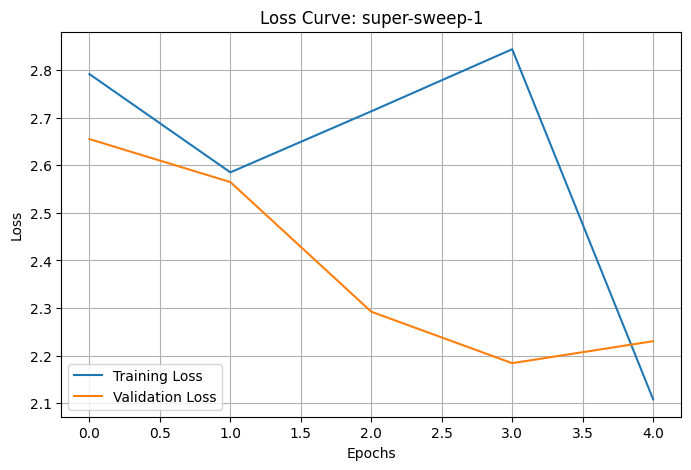

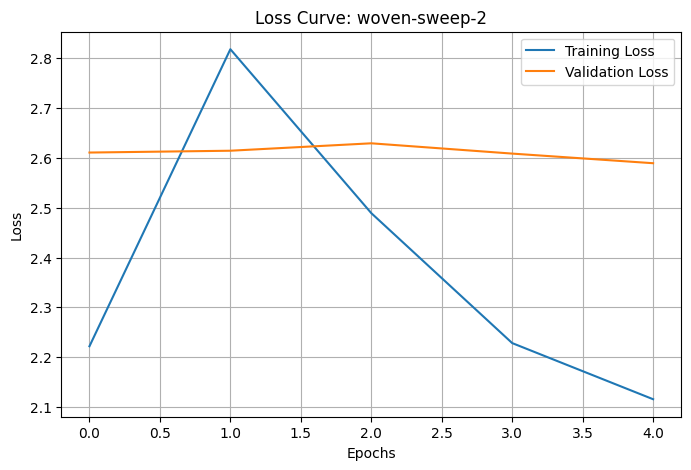

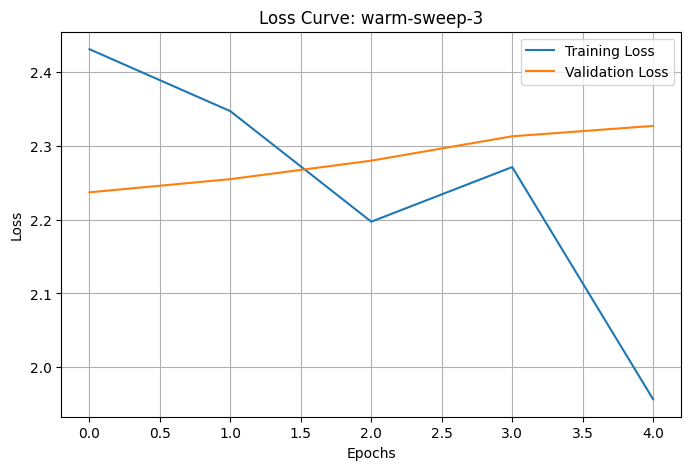

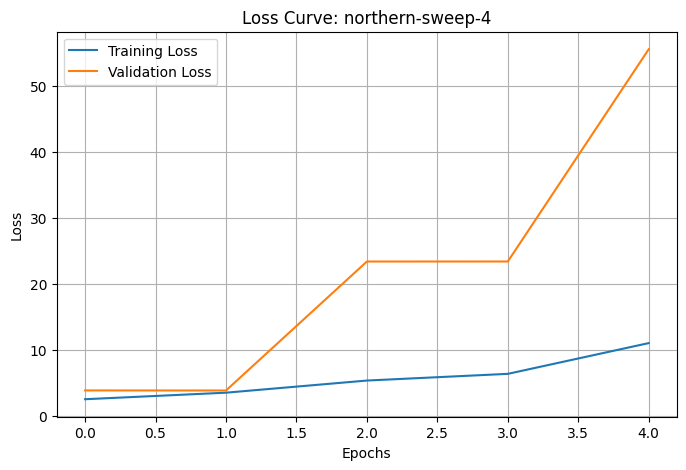

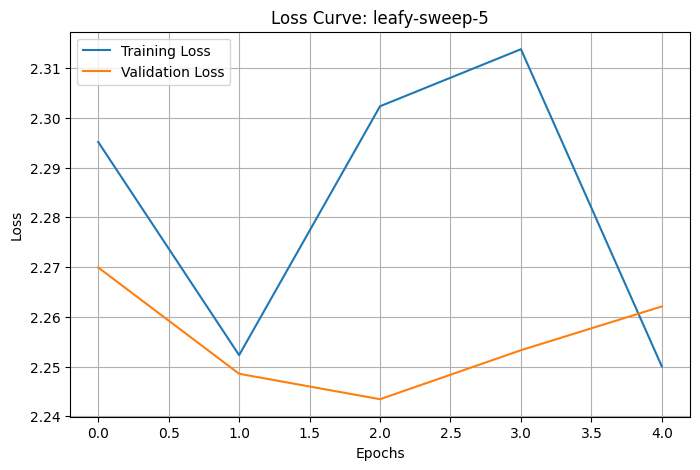

In [7]:
import torch
import torch.nn as nn
import torch.optim as optim
import wandb
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, Subset

# Define dropout variants
class DropConnect(nn.Module):
    def __init__(self, p=0.5):
        super(DropConnect, self).__init__()
        self.p = p

    def forward(self, x):
        if self.training:
            mask = torch.rand_like(x) > self.p
            return x * mask / (1 - self.p)  # DropConnect scaling
        else:
            return x

class DropBlock(nn.Module):
    def __init__(self, block_size, p=0.5):
        super(DropBlock, self).__init__()
        self.block_size = block_size
        self.p = p

    def forward(self, x):
        if self.training:
            # For simplicity, DropBlock logic should be implemented here
            # Typically you'd randomly mask square blocks of activations
            pass
        else:
            return x

class FlipOverDropout(nn.Module):
    def __init__(self, p=0.5):
        super(FlipOverDropout, self).__init__()
        self.p = p

    def forward(self, x):
        if self.training:
            # FlipOver logic
            return x.flip(1) if torch.rand(1).item() > self.p else x
        else:
            return x

# Define Neural Network Architectures
class StandardNeuralNet(nn.Module):
    def __init__(self, input_size, hidden_layers, layer_size, output_size, activation, weight_init):
        super(StandardNeuralNet, self).__init__()
        layers = []
        prev_size = input_size

        for _ in range(hidden_layers):
            layer = nn.Linear(prev_size, layer_size)
            if weight_init == 'Xavier':
                nn.init.xavier_uniform_(layer.weight)
            elif weight_init == 'Threshold':
                nn.init.uniform_(layer.weight, -0.1, 0.1)  # Threshold initialization
            layers.append(layer)
            layers.append(activation())
            prev_size = layer_size

        layers.append(nn.Linear(prev_size, output_size))
        self.model = nn.Sequential(*layers)

    def forward(self, x):
        return self.model(x)

class DropoutNN(nn.Module):
    def __init__(self, input_size, hidden_layers, layer_size, output_size, activation, p, weight_init, dropout_type='random'):
        super(DropoutNN, self).__init__()
        layers = []
        prev_size = input_size

        for _ in range(hidden_layers):
            layer = nn.Linear(prev_size, layer_size)
            if weight_init == 'Xavier':
                nn.init.xavier_uniform_(layer.weight)
            elif weight_init == 'Threshold':
                nn.init.uniform_(layer.weight, -0.1, 0.1)  # Threshold initialization
            layers.append(layer)
            if dropout_type == 'random':
                layers.append(nn.Dropout(p))
            elif dropout_type == 'dropconnect':
                layers.append(DropConnect(p))
            elif dropout_type == 'flipover':
                layers.append(FlipOverDropout(p))
            prev_size = layer_size

        layers.append(nn.Linear(prev_size, output_size))
        self.model = nn.Sequential(*layers)

    def forward(self, x):
        return self.model(x)

# Training function
def train_network(config=None):
    with wandb.init(config=config):
        config = wandb.config

        # Load dataset
        (X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
        X_train = X_train.reshape(X_train.shape[0], -1) / 255.0
        X_test = X_test.reshape(X_test.shape[0], -1) / 255.0

        # Select only 20 random samples
        random_indices = np.random.choice(len(X_train), 20, replace=False)
        X_train, y_train = X_train[random_indices], y_train[random_indices]

        # Split into train and validation sets (90% train, 10% validation)
        X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

        # Convert to PyTorch tensors
        tensor_x_train = torch.tensor(X_train, dtype=torch.float32)
        tensor_y_train = torch.tensor(y_train, dtype=torch.long)
        train_loader = DataLoader(torch.utils.data.TensorDataset(tensor_x_train, tensor_y_train),
                                  batch_size=config.batch_size, shuffle=True)

        tensor_x_val = torch.tensor(X_val, dtype=torch.float32)
        tensor_y_val = torch.tensor(y_val, dtype=torch.long)
        val_loader = DataLoader(torch.utils.data.TensorDataset(tensor_x_val, tensor_y_val),
                                batch_size=config.batch_size, shuffle=False)

        # Initialize model
        activation_fn = {'sigmoid': nn.Sigmoid, 'tanh': nn.Tanh, 'ReLU': nn.ReLU}[config.activation]
        model = DropoutNN(X_train.shape[1], config.hidden_layers, config.layer_size, 10,
                          activation=activation_fn, p=config.dropout_prob, weight_init=config.weight_init, dropout_type=config.dropout_type)

        # Define optimizer with learning rate and momentum
        optimizer = getattr(optim, config.optimizer)(model.parameters(), lr=config.learning_rate, weight_decay=config.weight_decay, momentum=config.momentum)
        criterion = nn.CrossEntropyLoss()

        # Tracking loss for visualization
        train_losses = []
        val_losses = []

        # Training loop
        for epoch in range(config.epochs):
            model.train()
            epoch_loss = 0
            for data, target in train_loader:
                optimizer.zero_grad()
                output = model(data)
                loss = criterion(output, target)
                loss.backward()
                optimizer.step()
                epoch_loss += loss.item()

            avg_train_loss = epoch_loss / len(train_loader)
            train_losses.append(avg_train_loss)
            wandb.log({"Training Loss": avg_train_loss})

            # Validation
            model.eval()
            val_loss = 0
            with torch.no_grad():
                for data, target in val_loader:
                    output = model(data)
                    loss = criterion(output, target)
                    val_loss += loss.item()

            avg_val_loss = val_loss / len(val_loader)
            val_losses.append(avg_val_loss)
            wandb.log({"Validation Loss": avg_val_loss})

            if epoch % 5 == 0:
                print(f"Epoch {epoch}: Training Loss = {avg_train_loss:.4f}, Validation Loss = {avg_val_loss:.4f}")

        # Generate and log plots
        plt.figure(figsize=(8, 5))
        plt.plot(range(config.epochs), train_losses, label="Training Loss")
        plt.plot(range(config.epochs), val_losses, label="Validation Loss")
        plt.xlabel("Epochs")
        plt.ylabel("Loss")
        plt.title(f"Loss Curve: {wandb.run.name}")  # This line is changed
        plt.legend()
        plt.grid()

        # Save and log plot to WandB
        plt.savefig(f"{wandb.run.name}.png")  # Save with the run name
        wandb.log({f"Loss Curve": wandb.Image(f"{wandb.run.name}.png")})

        # Summary
        wandb.summary["Final Training Loss"] = train_losses[-1]
        wandb.summary["Final Validation Loss"] = val_losses[-1]


# Define WandB Sweep Configuration
sweep_config = {
    "method": "bayes",  # Bayesian optimization for efficient search
    "metric": {"name": "Validation Loss", "goal": "minimize"},
    "parameters": {
        "epochs": {"values": [5]},  # Reduced epochs for quicker experiments
        "hidden_layers": {"values": [2, 3]},  # Experiment with 2 or 3 layers
        "layer_size": {"values": [100, 800, 1024]},  # Layer sizes to try
        "weight_decay": {"values": [0.0005]},
        "learning_rate": {"values": [0.01, 0.001]},
        "momentum": {"values": [0.9, 0.5]},
        "optimizer": {"values": ["SGD"]},
        "batch_size": {"values": [16]},  # Reduced batch size for faster training
        "weight_init": {"values": ["Xavier", "Threshold"]},
        "activation": {"values": ["ReLU", "sigmoid"]},
        "dropout_prob": {"values": [0.2, 0.5]},
        "dropout_type": {"values": ["random", "dropconnect", "flipover"]}  # Test different dropout types
    }
}

# Initialize the sweep
sweep_id = wandb.sweep(sweep_config, project="Advanced-Neural-Networks")

# Run the sweep agent
wandb.agent(sweep_id, function=train_network, count=5)
